In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import asterion as ast

ast.style.use("asterion-light")

/Users/alyttle/.pyenv/versions/asterion/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
filename = "/Users/alyttle/OneDrive/Data/Asterion/mesa_data.hdf5"
df = pd.read_hdf(filename)
df.head()

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,E_0_36,E_0_37,E_0_38,E_0_39,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname
0,profile4,152.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000006,0.000002,0.000001,7.889056e-07,6.149682e-07,15247.850269,2037.139686,0.029961,38796.631185,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
1,profile5,153.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000008,0.000002,0.000001,8.212464e-07,6.273383e-07,14809.891105,1980.528826,0.029540,37900.327592,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
2,profile6,154.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000013,0.000003,0.000001,8.515127e-07,6.398741e-07,14496.838617,1940.585790,0.029221,37222.634389,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
3,profile7,155.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000018,0.000003,0.000001,8.790797e-07,6.513090e-07,14220.559706,1878.217087,0.028561,36703.539749,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1
4,profile8,156.0,0.0,0.8,0.32,0.036803,0.5,2.1,0.0,0.8,...,0.000027,0.000003,0.000001,9.036751e-07,6.612813e-07,14054.932771,1883.449431,0.028860,36302.082709,m0.8Y0.32FeH0.5MLT2.1ov0.0006666666666666673dif1


In [70]:
seed = 10
num_samples = 1000
mask = (df["star_age"] < 20) & (df["log_g"] > 2.5) & (df["frac_age"] > 0.01)

sample = df[mask].sample(num_samples, random_state=seed)
sample.head()

,filename,model_number,evol_stage,initial_mass,initial_Yinit,initial_Zinit,initial_feh,initial_MLT,initial_fov,star_mass,...,E_0_36,E_0_37,E_0_38,E_0_39,E_0_40,tau_he,delta_he,amp_he,tau_cz,dirname
103902,profile804,970.0,2.0,1.1,0.24,0.004325,-0.5,2.1,0.0,1.099756,...,8.452921e-09,9.046415e-09,9.976489e-09,1.141293e-08,1.331501e-08,1850.684737,848.307490,-0.007586,2253.760403,m1.1Y0.24FeH-0.5MLT2.1ov0.005000000000000001dif1
201678,profile543,691.0,1.0,1.4,0.24,0.041145,0.5,1.9,0.0,1.400000,...,1.178073e-08,1.668898e-08,3.297010e-08,1.980083e-07,2.812106e-07,890.384019,135.532941,0.014902,2601.415525,m1.4Y0.24FeH0.5MLT1.9ov0.009333333333333329dif0
84737,profile436,584.0,1.0,1.0,0.28,0.038970,0.5,2.3,0.0,1.000000,...,3.928249e-09,3.936494e-09,3.969529e-09,4.037986e-09,4.157220e-09,528.566097,55.417425,0.006371,1802.456882,m1.0Y0.28FeH0.5MLT2.3ov0.003555555555555556dif1
236041,profile643,791.0,1.0,1.5,0.24,0.013511,0.0,2.3,0.0,1.500000,...,1.001731e-08,6.852518e-09,6.001923e-09,5.728432e-09,5.726182e-09,1599.806077,874.369191,0.002460,1512.039053,m1.5Y0.24FeH0.0MLT2.3ov0.010777777777777778dif0
221324,profile1073,1534.0,2.0,1.5,0.28,0.038980,0.5,2.3,0.0,1.499133,...,2.655225e-06,1.354274e-06,9.146945e-07,7.068856e-07,5.924099e-07,18928.092597,2822.377872,0.039909,50817.574152,m1.5Y0.28FeH0.5MLT2.3ov0.010777777777777778dif0


In [71]:
sample.columns[:80]

Index(['filename', 'model_number', 'evol_stage', 'initial_mass',
       'initial_Yinit', 'initial_Zinit', 'initial_feh', 'initial_MLT',
       'initial_fov', 'star_mass', 'star_age', 'ms_age', 'frac_age',
       'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1',
       'surface_he4', 'surface_Z', 'star_feh', 'center_h1', 'center_he4',
       'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu',
       'delta_Pg', 'nu_max', 'acoustic_cutoff', 'nu_0_1', 'nu_0_2', 'nu_0_3',
       'nu_0_4', 'nu_0_5', 'nu_0_6', 'nu_0_7', 'nu_0_8', 'nu_0_9', 'nu_0_10',
       'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15', 'nu_0_16',
       'nu_0_17', 'nu_0_18', 'nu_0_19', 'nu_0_20', 'nu_0_21', 'nu_0_22',
       'nu_0_23', 'nu_0_24', 'nu_0_25', 'nu_0_26', 'nu_0_27', 'nu_0_28',
       'nu_0_29', 'nu_0_30', 'nu_0_31', 'nu_0_32', 'nu_0_33', 'nu_0_34',
       'nu_0_35', 'nu_0_36', 'nu_0_37', 'nu_0_38', 'nu_0_39', 'nu_0_40',
       'E_0_1', 'E_0_2', 'E_0_3', 'E_0_4', 'E_0_5', 'E_0_6', '

In [72]:
sample["log_luminosity"] = np.log10(sample["luminosity"])

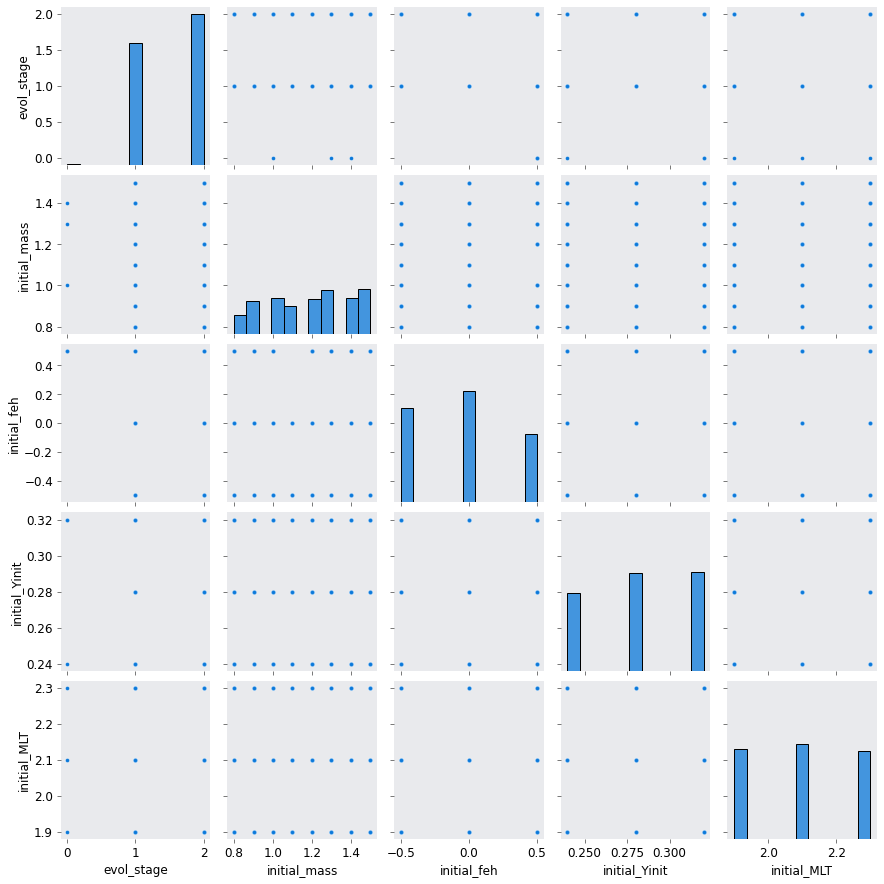

In [73]:
sns.pairplot(
    sample, 
    vars=[
        "evol_stage",
        "initial_mass", 
        "initial_feh", 
        "initial_Yinit", 
        "initial_MLT"
    ]
);

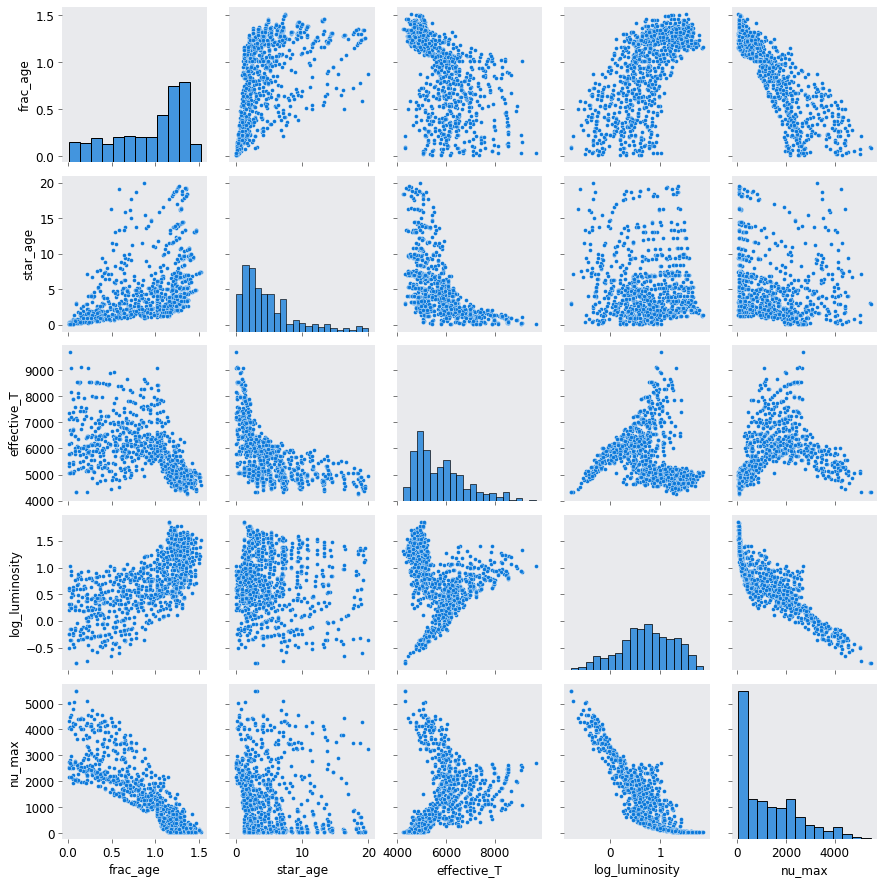

In [74]:
sns.pairplot(
    sample, 
    vars=[
        "frac_age", 
        "star_age", 
        "effective_T", 
        "log_luminosity",
        "nu_max",
    ]
);

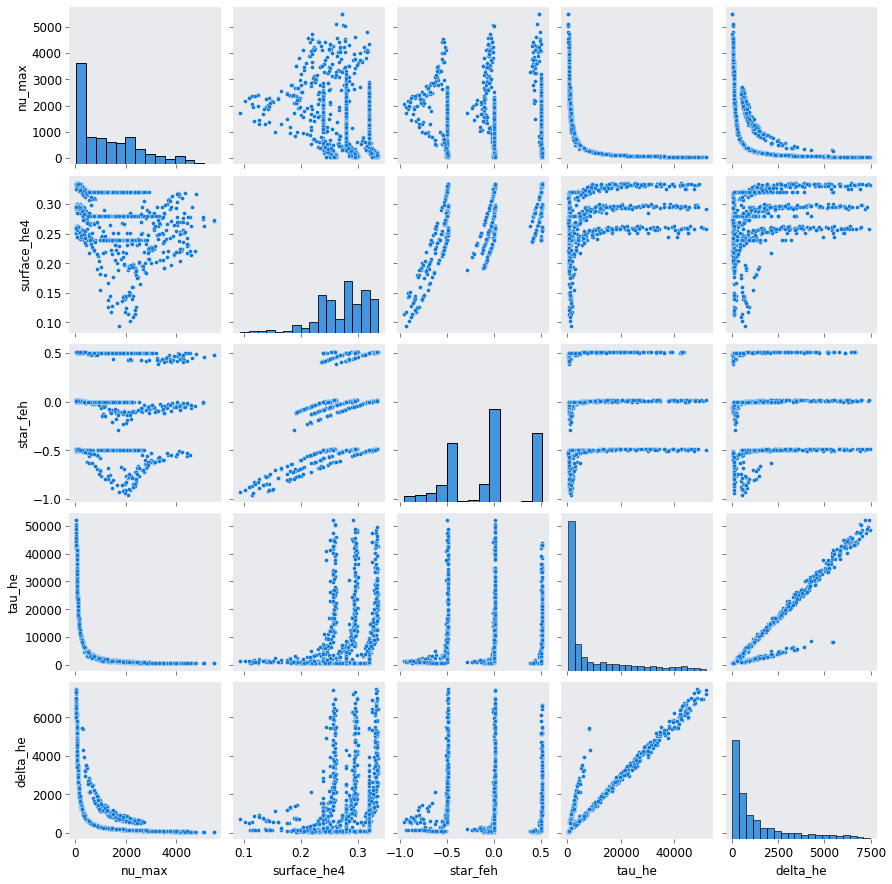

In [75]:
sns.pairplot(
    sample, 
    vars=[
        "nu_max",
        "surface_he4", 
        "star_feh",
        "tau_he",
        "delta_he",
    ]
);

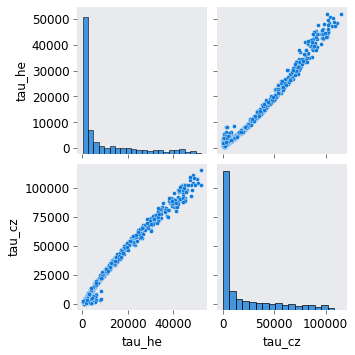

In [76]:
sns.pairplot(
    sample, 
    vars=[
        "tau_he",
        "tau_cz",
    ]
);

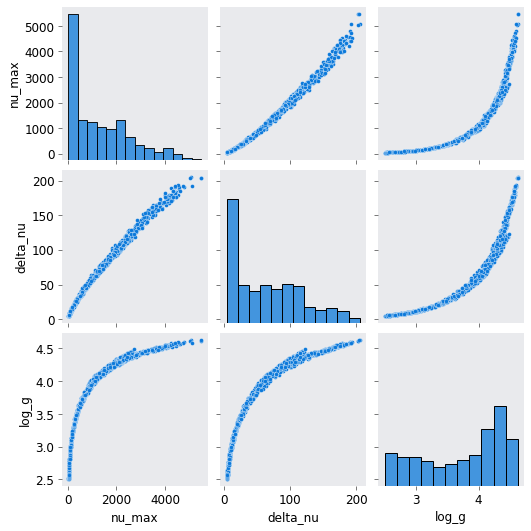

In [77]:
sns.pairplot(
    sample, 
    vars=[
        "nu_max",
        "delta_nu",
        "log_g"
    ]
);

In [78]:
n = np.arange(1, 41)
nu_cols = [f"nu_0_{i}" for i in n]

In [79]:
i = 1
nu_max = (sample["nu_max"].iloc[i], 0.05*sample["nu_max"].iloc[i])
teff = (sample["effective_T"].iloc[i], 50.0)

Mosser et al. 2010 and Pbjam prior

In [80]:
fwhm = 0.6 * nu_max[0]**0.9  # obs modes in this range

# best case senario for obs modes
nu_low = nu_max[0] - fwhm
nu_high = nu_max[0] + fwhm

In [81]:
nu = sample[nu_cols].iloc[i]
mask = (nu > nu_low) & (nu < nu_high) & (nu > 0) & (nu < sample["acoustic_cutoff"].iloc[i])
print(nu[mask])

nu_0_16    1745.168582
nu_0_17    1844.935220
nu_0_18    1944.279006
nu_0_19    2043.909465
nu_0_20    2144.730828
nu_0_21    2246.125890
nu_0_22    2347.783488
nu_0_23    2449.354897
nu_0_24    2550.865327
nu_0_25    2652.531745
nu_0_26    2754.421226
nu_0_27    2856.711844
Name: 201678, dtype: float64


Take median delta nu over all modes

In [82]:
dnu = np.median(np.diff(nu[mask]))
delta_nu = (dnu, 0.01*dnu)

model = ast.GlitchModel(nu_max, delta_nu, teff=teff)

In [83]:
infer = ast.Inference(model, n=n[mask], nu=nu[mask])

In [84]:
infer.prior_predictive()
prior_data = infer.get_data()

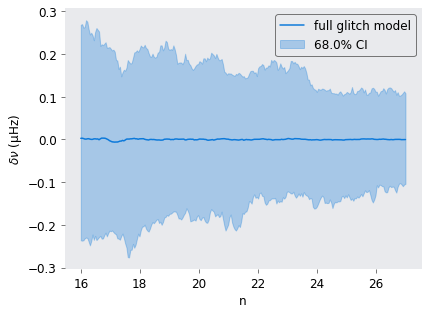

In [85]:
ast.plot_glitch(prior_data, group="prior");

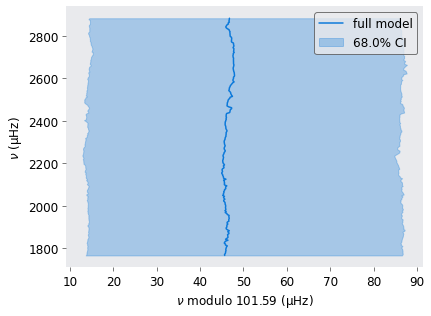

In [86]:
ast.plot_echelle(prior_data, group="prior");

In [87]:
infer.sample()

Running nested sampling using the 'multi_ellipsoid' sampler with 50 live points and 50000 maximum samples...
Completed in 12.4 seconds.


In [88]:
infer.posterior_predictive()
data = infer.get_data()

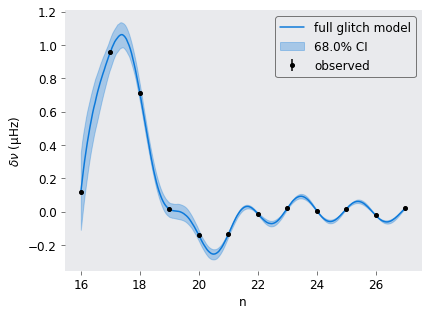

In [89]:
ast.plot_glitch(data);

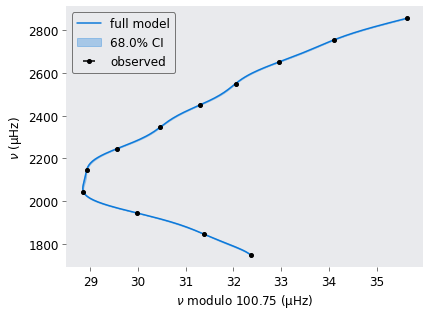

In [90]:
ast.plot_echelle(data);

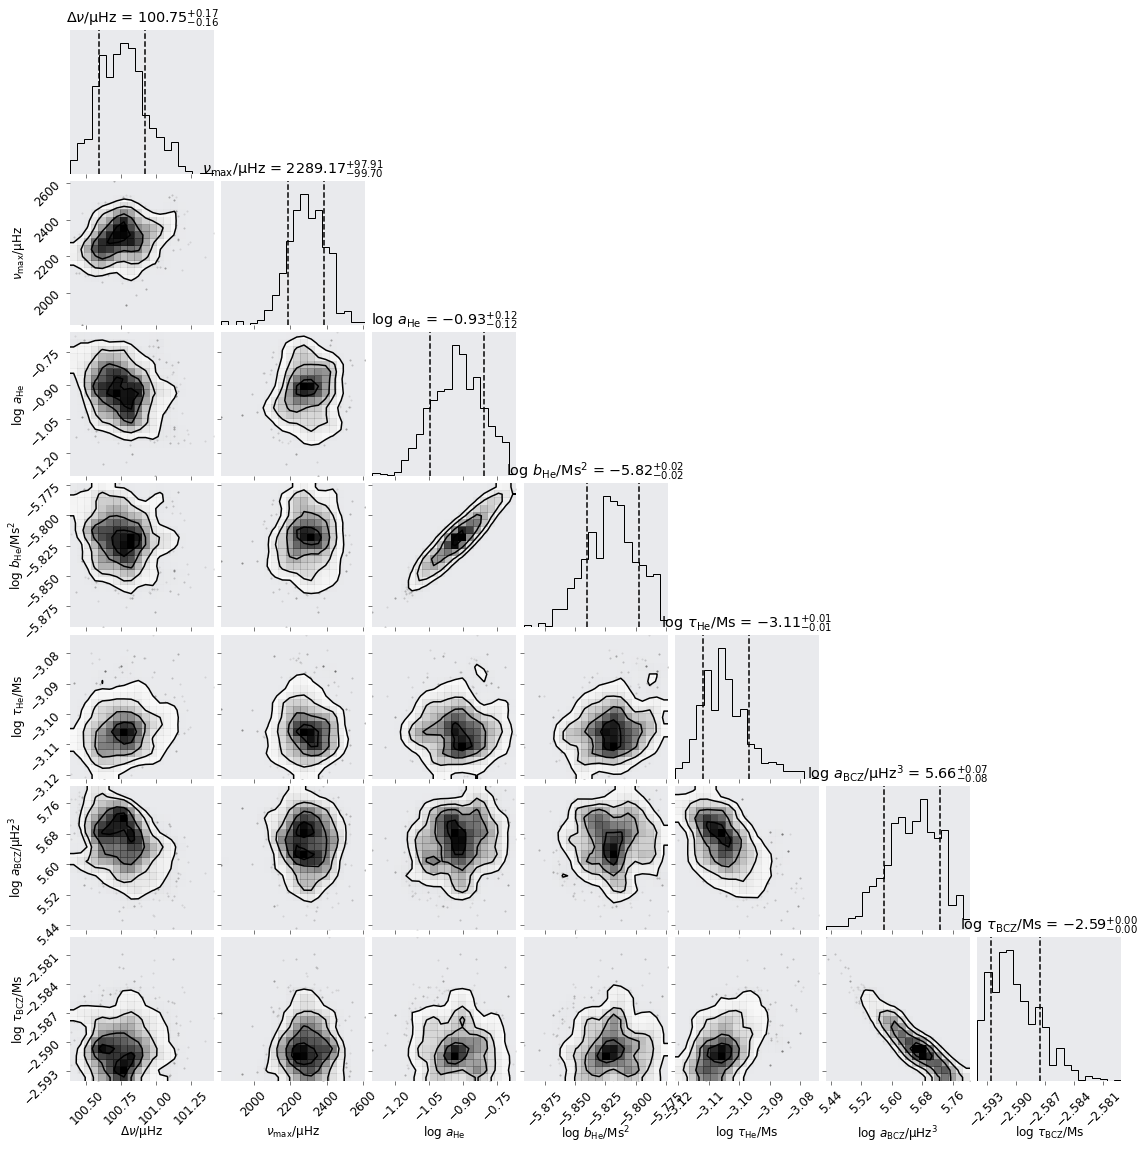

In [91]:
ast.plot_corner(
    data,
    var_names=["delta_nu", "nu_max", "log_a_he", "log_b_he", "log_tau_he", "log_a_cz", "log_tau_cz"]
);

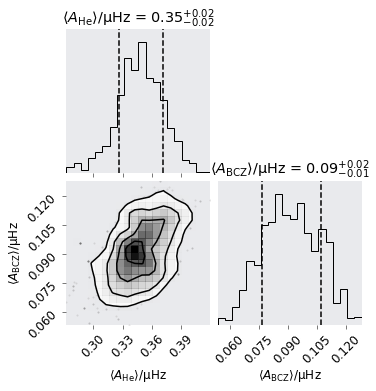

In [92]:
ast.plot_corner(data, var_names=["he_amplitude", "cz_amplitude"]);

In [93]:
np.log10(sample[["tau_he", "tau_cz"]].iloc[i]) - 6.0

tau_he   -3.050423
tau_cz   -2.584790
Name: 201678, dtype: float64

In [108]:
sample.columns[:50]

Index(['filename', 'model_number', 'evol_stage', 'initial_mass',
       'initial_Yinit', 'initial_Zinit', 'initial_feh', 'initial_MLT',
       'initial_fov', 'star_mass', 'star_age', 'ms_age', 'frac_age',
       'effective_T', 'luminosity', 'radius', 'log_g', 'surface_h1',
       'surface_he4', 'surface_Z', 'star_feh', 'center_h1', 'center_he4',
       'log_center_T', 'log_center_Rho', 'he_core_mass', 'delta_nu',
       'delta_Pg', 'nu_max', 'acoustic_cutoff', 'nu_0_1', 'nu_0_2', 'nu_0_3',
       'nu_0_4', 'nu_0_5', 'nu_0_6', 'nu_0_7', 'nu_0_8', 'nu_0_9', 'nu_0_10',
       'nu_0_11', 'nu_0_12', 'nu_0_13', 'nu_0_14', 'nu_0_15', 'nu_0_16',
       'nu_0_17', 'nu_0_18', 'nu_0_19', 'nu_0_20'],
      dtype='object')

In [109]:
cols = [
    "dirname",
    "filename",
    "initial_mass",
    "initial_Yinit",
    "initial_feh",
    "initial_MLT",
    "effective_T",
    "radius",
    "delta_nu",
    "nu_max",
    "acoustic_cutoff",
    "tau_he",
    "tau_cz",
    "surface_he4",
    "star_feh",
] + nu_cols

sample[cols].to_csv("data/mesa_sample.csv", index=False)